In [46]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from folium.plugins import MarkerCluster
from streamlit_folium import folium_static
import folium
from folium.plugins import MarkerCluster
from streamlit_folium import folium_static
import seaborn as sns



## Data Understanding

In [47]:
# Load data
file_path = "DatasetDRB_peta.csv"
df = pd.read_csv(file_path)

In [48]:
df.head()

,No,Kecamatan,Longsor,Gempa,Longitude,Latitude
0,1,Jatiluhur,16,0,107.4115,-6.5272
1,2,Sukasari,8,0,107.2941,-6.5389
2,3,Maniis,8,1,107.3168,-6.6993
3,4,Tegalwaru,10,0,107.3568,-6.6717
4,5,Plered,5,0,107.3906,-6.6415


In [49]:
# Menampilkan ringkasan statistik
df.describe()

,No,Longsor,Gempa,Longitude,Latitude
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,9.000000,8.176471,1.176471,107.445147,-6.599135
std,5.049752,5.854862,2.603730,0.079852,0.080643
min,1.000000,0.000000,0.000000,107.294100,-6.709800
25%,5.000000,2.000000,0.000000,107.402500,-6.675100
50%,9.000000,8.000000,0.000000,107.446300,-6.613500
75%,13.000000,10.000000,1.000000,107.481400,-6.527200
max,17.000000,21.000000,10.000000,107.586200,-6.485700


In [50]:
# Informasi umum tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         17 non-null     int64  
 1   Kecamatan  17 non-null     object 
 2   Longsor    17 non-null     int64  
 3   Gempa      17 non-null     int64  
 4   Longitude  17 non-null     float64
 5   Latitude   17 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 944.0+ bytes


In [51]:
# Menampilkan nilai unik untuk setiap kolom
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:", unique_values)


Unique values for No: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Unique values for Kecamatan: ['Jatiluhur' 'Sukasari' 'Maniis' 'Tegalwaru' 'Plered' 'Sukatani'
 'Darangdan' 'Bojong' 'Wanayasa' 'Kiarapedes' 'Pasawahan' 'Pondoksalam'
 'Purwakarta' 'Babakancikao' 'Campaka' 'Cibatu' 'Bungursari']
Unique values for Longsor: [16  8 10  5 14  9  2 21  7  0  1]
Unique values for Gempa: [ 0  1  5  2 10]
Unique values for Longitude: [107.4115 107.2941 107.3168 107.3568 107.3906 107.4203 107.4372 107.5017
 107.5445 107.5862 107.4677 107.4814 107.4463 107.4025 107.4804 107.5508
 107.4787]
Unique values for Latitude: [-6.5272 -6.5389 -6.6993 -6.6717 -6.6415 -6.6166 -6.6924 -6.7098 -6.6787
 -6.6751 -6.5866 -6.6135 -6.5407 -6.4934 -6.5115 -6.5027 -6.4857]


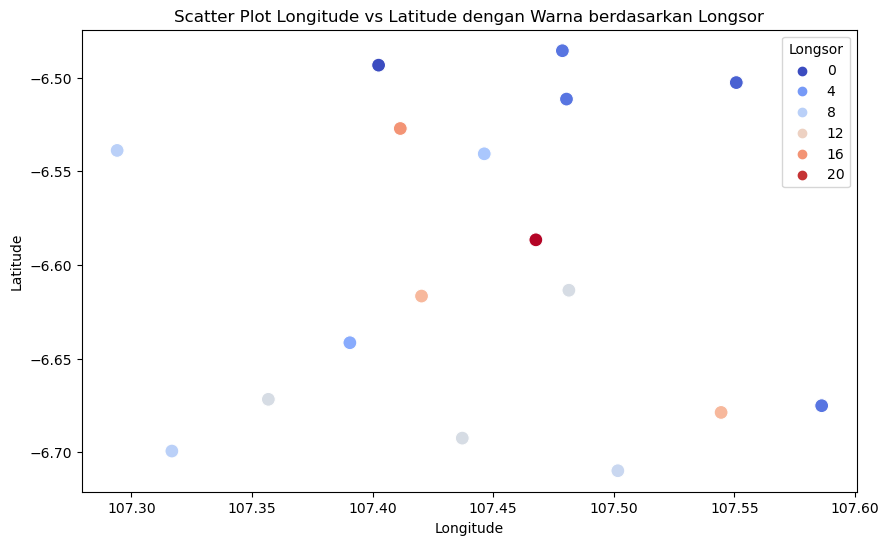

In [52]:
# Menampilkan scatter plot antara Longitude dan Latitude dengan warna berdasarkan Longsor
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Longsor', palette='coolwarm', s=100)
plt.title('Scatter Plot Longitude vs Latitude dengan Warna berdasarkan Longsor')
plt.show()

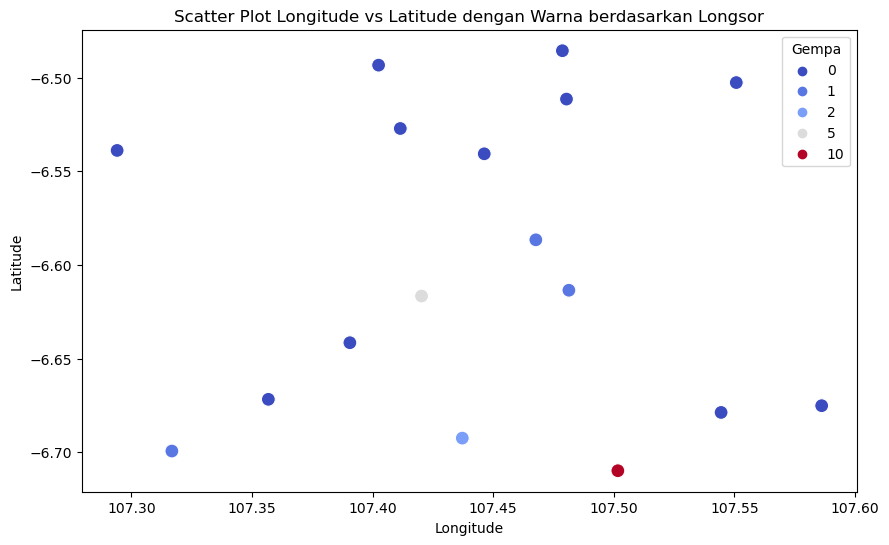

In [53]:
# Menampilkan scatter plot antara Longitude dan Latitude dengan warna berdasarkan Longsor
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Gempa', palette='coolwarm', s=100)
plt.title('Scatter Plot Longitude vs Latitude dengan Warna berdasarkan Longsor')
plt.show()

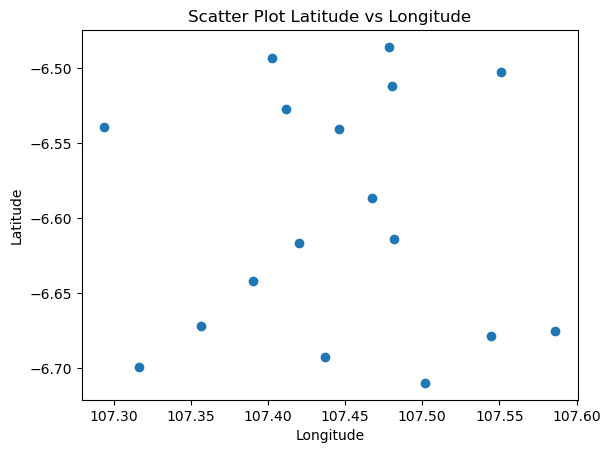

In [54]:
# Scatter plot antara Latitude dan Longitude
plt.scatter(df['Longitude'], df['Latitude'])
plt.title('Scatter Plot Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Data Preparation

In [55]:
# Menghilangkan kolom Desa, Latitude, dan Longitude dari dataset untuk normalisasi
data_for_normalization = df.drop(['Kecamatan', 'Latitude', 'Longitude'], axis=1)

In [56]:
# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_for_normalization)

In [57]:
# Membuat DataFrame baru dengan data yang sudah dinormalisasi
df_normalized = pd.DataFrame(normalized_data, columns=data_for_normalization.columns)

In [58]:
# Menambahkan kembali kolom Kecamatan, Latitude, dan Longitude
df_normalized[['Kecamatan', 'Latitude', 'Longitude']] = df[['Kecamatan', 'Latitude', 'Longitude']]

In [59]:
# Menampilkan lima baris pertama dari dataset yang sudah dinormalisasi
df_normalized.head()

,No,Longsor,Gempa,Kecamatan,Latitude,Longitude
0,-1.632993,1.377370,-0.465746,Jatiluhur,-6.5272,107.4115
1,-1.428869,-0.031068,-0.465746,Sukasari,-6.5389,107.2941
2,-1.224745,-0.031068,-0.069862,Maniis,-6.6993,107.3168
3,-1.020621,0.321041,-0.465746,Tegalwaru,-6.6717,107.3568
4,-0.816497,-0.559233,-0.465746,Plered,-6.6415,107.3906


In [60]:
# Pilih kolom yang akan digunakan untuk clustering
features = ['Longsor', 'Gempa']
X = df[features]

In [61]:
# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Modeling

In [63]:
# Elbow Method untuk menentukan jumlah klaster yang optimal
inertias = []
range_clusters = range(2, 11)
for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

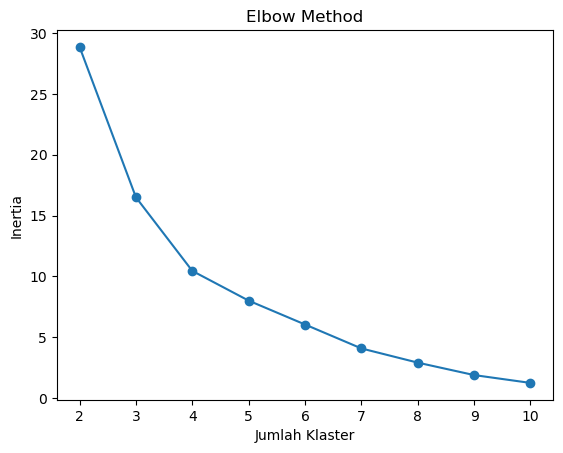

In [64]:
# Menampilkan grafik Elbow Method
plt.plot(range_clusters, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.show()

In [35]:
# Pilih jumlah klaster yang optimal
num_clusters_optimal = 3

In [36]:
# Melakukan clustering dengan KMeans
kmeans = KMeans(n_clusters=num_clusters_optimal, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
# Kolom untuk pengelompokan (Longsor dan Gempa)
kolom_pengelompokan = ["Longsor", "Gempa"]

In [38]:
# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df[kolom_pengelompokan])
df_normalized = pd.DataFrame(normalized_data, columns=kolom_pengelompokan)

In [39]:
# Kategorikan klaster berdasarkan rentang kerawanan wilayah
Vulnerability_ranges = [-1, 5, 9, np.inf]
df["Vulnerability Category"] = pd.cut(
    df[kolom_pengelompokan].mean(axis=1),
    bins=Vulnerability_ranges,
    labels=["Rendah", "Sedang", "Tinggi"],
)

In [40]:
# Membuat peta dengan lokasi rata-rata latitude dan longitude
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)


In [41]:
# Menambahkan marker cluster
marker_cluster = MarkerCluster().add_to(m)

In [42]:
# Menambahkan penanda untuk setiap klaster
for i, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
                  popup=f"Klaster {row['Cluster'] + 1}: {row['Kecamatan']}").add_to(marker_cluster)


In [43]:
m

In [45]:
# Menampilkan hasil klaster di dataset
df

,No,Kecamatan,Longsor,Gempa,Longitude,Latitude,Cluster,Vulnerability Category
0,1,Jatiluhur,16,0,107.4115,-6.5272,1,Sedang
1,2,Sukasari,8,0,107.2941,-6.5389,1,Rendah
2,3,Maniis,8,1,107.3168,-6.6993,1,Rendah
3,4,Tegalwaru,10,0,107.3568,-6.6717,1,Rendah
4,5,Plered,5,0,107.3906,-6.6415,1,Rendah
5,6,Sukatani,14,5,107.4203,-6.6166,2,Tinggi
6,7,Darangdan,10,2,107.4372,-6.6924,1,Sedang
7,8,Bojong,9,10,107.5017,-6.7098,2,Tinggi
8,9,Wanayasa,14,0,107.5445,-6.6787,1,Sedang
9,10,Kiarapedes,2,0,107.5862,-6.6751,0,Rendah


## EVALUASI

c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2, the silhouette score is 0.39


c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3, the silhouette score is 0.43


c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4, the silhouette score is 0.42


c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5, the silhouette score is 0.39


c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6, the silhouette score is 0.36


c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 7, the silhouette score is 0.34


c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 8, the silhouette score is 0.31


c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 9, the silhouette score is 0.30


c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\raiha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 10, the silhouette score is 0.28


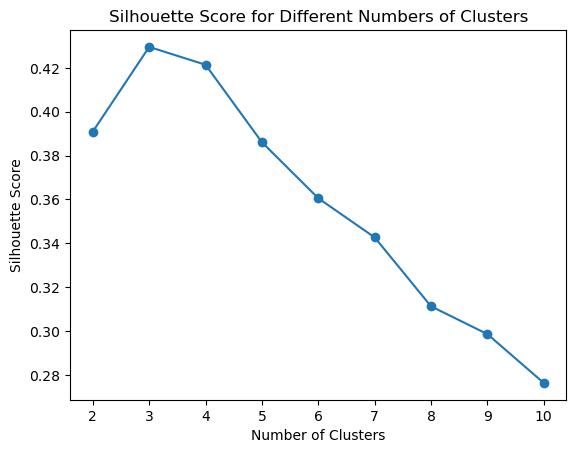

In [62]:
# Data yang digunakan (X_scaled adalah data yang sudah dinormalisasi)
X_scaled = df_normalized.drop(['Kecamatan', 'Latitude', 'Longitude'], axis=1)

# List untuk menyimpan nilai silhouette score
silhouette_scores = []

# Range jumlah klaster yang akan dicoba
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter=50)
    kmeans.fit(X_scaled)

    # Mendapatkan label klaster untuk setiap data point
    cluster_labels = kmeans.labels_

    # Menghitung silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    
    # Menyimpan nilai silhouette score
    silhouette_scores.append(silhouette_avg)

    print("For n_clusters = {0}, the silhouette score is {1:.2f}".format(num_clusters, silhouette_avg))

# Menampilkan grafik silhouette score untuk setiap jumlah klaster
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
